<a href="https://colab.research.google.com/github/SalmanEunus27/ECARRNET---RAILWAY-FAULT-DETECTION-JOURNAL/blob/main/railway_fastener_rail_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("../input/railway-fault-dataset-rail-fastener-combined/railway_fastener_rail_combined/train _combined.csv", index_col = 0)
train.head()

,images,labels
0,131004959_171473721383413_8222187747086021011_...,Defective
1,131051004_382613492830631_1306891331783850055_...,Defective
2,131065180_999185033824671_7735147288489715620_...,Defective
3,131084537_190751489449739_279862595635733772_n...,Defective
4,131092897_149705809860659_8798464983059531038_...,Defective


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 157
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  1787 non-null   object
 1   labels  1787 non-null   object
dtypes: object(2)
memory usage: 41.9+ KB


In [ ]:
train["labels"].unique()

array(['Defective', 'Non Defective'], dtype=object)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
 #Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train['labels']= label_encoder.fit_transform(train['labels'])
 
train['labels'].unique()

array([0, 1])

In [ ]:
# label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# inv_label_mapping = {val: key for key, val in label_mapping.items()}

# print(inv_label_mapping, label_mapping)

In [ ]:
list(label_encoder.inverse_transform([0]))

['Defective']

In [ ]:
list(label_encoder.inverse_transform([1]))

['Non Defective']

In [ ]:
train["labels"].value_counts()

0    894
1    893
Name: labels, dtype: int64

In [ ]:
import os 

train_image = []

#Y = []

data_dir = '../input/railway-fault-dataset-rail-fastener-combined/railway_fastener_rail_combined'
image_list = train['images'].to_list()


for im_name in tqdm(image_list):
    path = os.path.join(data_dir, im_name)
    img = image.load_img(path, target_size=(300,300,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    #Y.append(train['diseasetype'][i])

#Y = np.array(Y)
X = np.array(train_image)

100%|██████████| 1787/1787 [03:22<00:00,  8.83it/s]


In [ ]:
X.shape

(1787, 300, 300, 3)

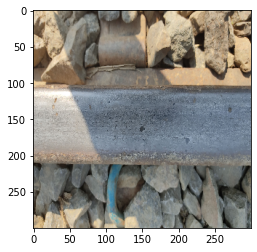

In [ ]:
plt.imshow(X[80])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


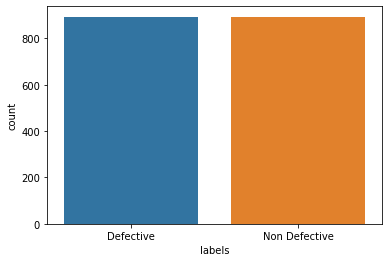

In [ ]:
import seaborn as sns
# visualize the target variable
g = sns.countplot(train['labels'])
g.set_xticklabels(['Defective','Non Defective'])
plt.show()

In [ ]:
Y = train['labels'].values

In [ ]:
Y.shape

(1787,)

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify = Y)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
#from keras.applications import V2
#model = VGG16()
from  tensorflow.keras.models import Model
# from keras.layers import concatenate
from  tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, GRU, Reshape, Concatenate,Bidirectional, Conv2D, MaxPooling2D, UpSampling2D, Flatten
#from  tensorflow.keras.applications.mobilenet import preprocess_input

from  tensorflow.keras.layers import GaussianNoise
input_img = Input(shape = (300,300,3))
f1_x = tf.keras.layers.Flatten()
#encoder
f1_x = Conv2D(128, (6, 6), activation='relu', kernel_initializer='he_normal')(input_img) #28 x 28 x 32
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) #14 x 14 x 32
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.35)
f1_x = Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_normal', padding='valid')(f1_x) #14 x 14 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.33)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) #7 x 7 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.3)
f1_x = Conv2D(64, (4, 4), activation='relu',kernel_initializer='he_normal', padding = 'valid')(f1_x) #7 x 7 x 128 (small and thick)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.49)
#decoder
f1_x = Conv2D(64, (6, 6), activation='relu', padding='valid',kernel_initializer='he_normal')(f1_x) #7 x 7 x 128
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.36)
f1_x = UpSampling2D((2,2))(f1_x) # 14 x 14 x 128
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.38)
f1_x = Conv2D(128, (6, 6), activation='relu', padding='valid',kernel_initializer='he_normal')(f1_x) # 14 x 14 x 64
tf.keras.layers.BatchNormalization()
#dropout=0.2
f1_x = UpSampling2D((2,2))(f1_x) # 28 x 28 x 64
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.37)
f1_x = Conv2D(1, (6, 6), activation='sigmoid', padding='valid', kernel_initializer='he_normal')(f1_x) # 28 x 28 x 1
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()

tf.keras.layers.Dropout(rate=0.5)
#f1_x = MinPooling2D(pool_size=(3, 3))(f1_x)     
# f1_base = Xception(weights='imagenet', include_top=False, input_shape=(450,450,3))
# f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))
f1_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(300,300,3))
tf.keras.layers.Flatten()
tf.keras.layers.Dropout(rate=0.45)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.5)
tf.keras.layers.BatchNormalization()
f1_x = f1_base.output
tf.keras.layers.BatchNormalization()
f1_x = GlobalAveragePooling2D()(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.4)
#f1_x = Conv2D(128, (3, 3), activation='relu', padding='same')(f1_x) #7 x 7 x 128
#f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) 
f1_x = Reshape([1,1536])(f1_x)
tf.keras.layers.Flatten()
f1_x = Bidirectional(tf.keras.layers.LSTM(2900, 
return_sequences=False, 
dropout=0.55),
input_shape=[1,1024],
merge_mode='concat')(f1_x)
tf.keras.layers.BatchNormalization()
#f1_x = Conv2D(128, (3, 3), activation='relu', padding='same')(f1_x) #7 x 7 x 128
#f1_x = MaxPooling2D(pool_size=(2, 2))(f1_x) 
#Regularization with noise
f1_x = GaussianNoise(0.20)(f1_x)
tf.keras.layers.BatchNormalization()
f1_x = Dense(100,activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l1_l2(0.01),kernel_constraint=tf.keras.constraints.max_norm(1.))(f1_x)
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.5)
tf.keras.layers.BatchNormalization()
f1_x = Dense(100,activation='relu', kernel_initializer='he_normal',kernel_constraint=tf.keras.constraints.max_norm(1.))(f1_x)
tf.keras.layers.Dropout(rate=0.58)
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()
tf.keras.layers.BatchNormalization()
tf.keras.layers.Dropout(rate=0.46)
tf.keras.layers.BatchNormalization()
#he_avg_int = keras.initializers.VarianceScaling(scale=2, mode = 'fan_avg', distribution='uniform')
#f1_x = Conv2D(64, (3, 3), activation='relu', padding='same')(f1_x)
tf.keras.layers.Flatten()
f1_x = Dense(1, activation='sigmoid', kernel_initializer='he_normal')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])
print(model_1.summary())

2022-04-24 19:10:09.156485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 19:10:09.245906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 19:10:09.246825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 19:10:09.248036: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 149, 149, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_12[0][0]     
___________________________

In [ ]:
model_1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
Y.shape

(1787,)

In [ ]:
Y_test.shape

(357,)

In [ ]:
result = model_1.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=6, verbose=1)

2022-04-24 19:11:03.980131: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1544400000 exceeds 10% of free system memory.
2022-04-24 19:11:05.565876: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1544400000 exceeds 10% of free system memory.
2022-04-24 19:11:06.691255: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-04-24 19:11:26.322590: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


239/239 [==============================] - ETA: 0s - loss: 5.0041 - accuracy: 0.7315

2022-04-24 19:12:24.650657: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 385560000 exceeds 10% of free system memory.
2022-04-24 19:12:25.066959: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 385560000 exceeds 10% of free system memory.


239/239 [==============================] - 87s 253ms/step - loss: 5.0041 - accuracy: 0.7315 - val_loss: 1.2141 - val_accuracy: 0.7227
Epoch 2/50
239/239 [==============================] - 56s 233ms/step - loss: 1.0736 - accuracy: 0.8210 - val_loss: 0.9790 - val_accuracy: 0.8431
Epoch 3/50
239/239 [==============================] - 56s 234ms/step - loss: 0.9094 - accuracy: 0.8762 - val_loss: 1.1744 - val_accuracy: 0.7451
Epoch 4/50
239/239 [==============================] - 56s 233ms/step - loss: 0.8738 - accuracy: 0.8909 - val_loss: 0.8236 - val_accuracy: 0.9160
Epoch 5/50
239/239 [==============================] - 56s 233ms/step - loss: 0.8074 - accuracy: 0.9133 - val_loss: 0.8732 - val_accuracy: 0.8964
Epoch 6/50
239/239 [==============================] - 56s 233ms/step - loss: 0.7606 - accuracy: 0.9357 - val_loss: 0.8844 - val_accuracy: 0.8936
Epoch 7/50
239/239 [==============================] - 56s 233ms/step - loss: 0.7017 - accuracy: 0.9378 - val_loss: 0.8693 - val_accuracy: 0.8

In [ ]:
import numpy as np
print(result.history['val_accuracy'])
print(np.mean(result.history['val_accuracy']))
print(np.max(result.history['val_accuracy']))
print(result.history['accuracy'])
print(np.mean(result.history['accuracy']))
print(np.max(result.history['accuracy']))

[0.7226890921592712, 0.843137264251709, 0.7450980544090271, 0.9159663915634155, 0.8963585495948792, 0.8935574293136597, 0.8963585495948792, 0.8935574293136597, 0.9159663915634155, 0.9327731132507324, 0.9271708726882935, 0.924369752407074, 0.9215686321258545, 0.918767511844635, 0.9159663915634155, 0.9047619104385376, 0.9019607901573181, 0.924369752407074, 0.9103641510009766, 0.9075630307197571, 0.9019607901573181, 0.8935574293136597, 0.913165271282196, 0.9215686321258545, 0.9299719929695129, 0.9299719929695129, 0.924369752407074, 0.8935574293136597, 0.9159663915634155, 0.9299719929695129, 0.9103641510009766, 0.9159663915634155, 0.9103641510009766, 0.8963585495948792, 0.9075630307197571, 0.9103641510009766, 0.8991596698760986, 0.924369752407074, 0.9215686321258545, 0.924369752407074, 0.913165271282196, 0.8963585495948792, 0.913165271282196, 0.9271708726882935, 0.9215686321258545, 0.9103641510009766, 0.9271708726882935, 0.9075630307197571, 0.8823529481887817, 0.918767511844635]
0.90408964

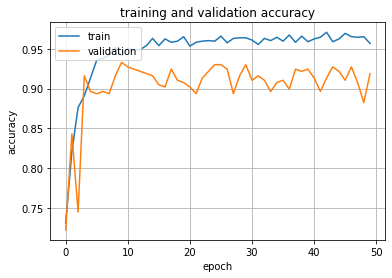

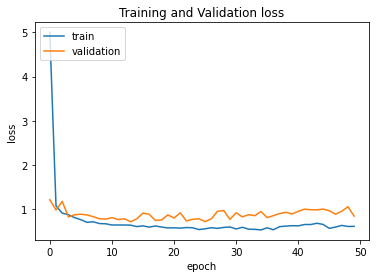

In [ ]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_1.evaluate(X_test,Y_test,batch_size=8)

2022-04-24 19:58:23.404066: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 385560000 exceeds 10% of free system memory.


45/45 [==============================] - 4s 91ms/step - loss: 0.8412 - accuracy: 0.9188


[0.8411509394645691, 0.918767511844635]

In [ ]:
y_pred=model_1.predict(X_test)

In [ ]:
#predict
y_pred=model_1.predict(X_test) # (n_images, 1)
y_classes = ((y_pred > 0.5)+0).ravel() 
#y_pred=np.argmax(y_pred,axis=1)
#y_pred

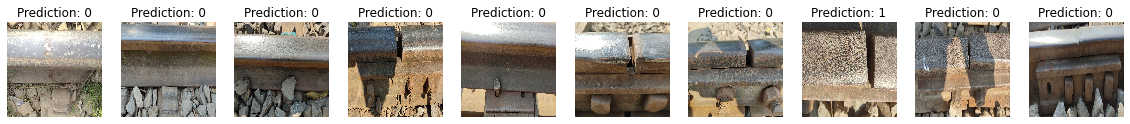

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, y_classes):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_classes,Y_test))

[[169  20]
 [  9 159]]


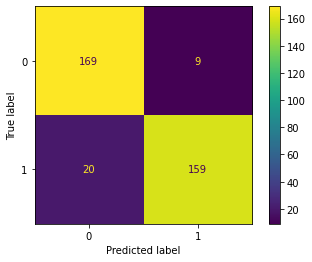

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_classes)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
from sklearn import datasets, svm, metrics

In [ ]:
#get classification report
print(classification_report(y_classes,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       189
           1       0.89      0.95      0.92       168

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



In [ ]:
cm = print(confusion_matrix(y_classes, Y_test))

[[169  20]
 [  9 159]]


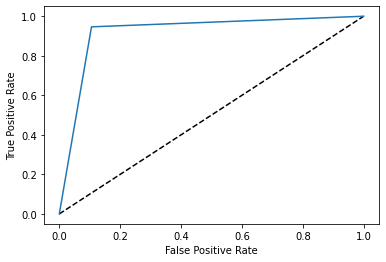

In [ ]:
from sklearn.metrics import roc_curve
#y_pred_prob = model.predict_proba(x_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_classes, Y_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,label = 'resnet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

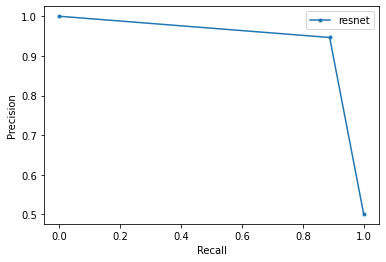

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(Y_test, y_classes)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='resnet')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

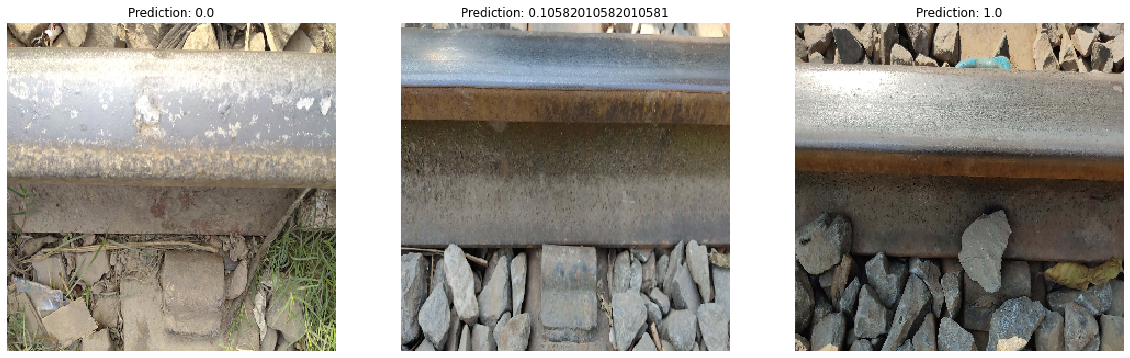

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
for ax, image, prediction in zip(axes, X_test, fpr):
    ax.set_axis_off()
    #image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
# l = []
# for i in range(len(y_pred)): 
#     if (Y_test[i]!=y_pred[i]):
#         l.append(i)
# print(l)
# # fig = plt.imshow(X[i])

# # # if Y[i]>0.5:
# # #     print("Actual Label: The Leaf is Healthy")
# # # else:
# # #           print("Actual label: The leaf has Blast")


# # if y_pred[i]>0.5:
# #     print("Prediction: The leaf is healthy")
# # else:
# #     print("Prediction: The leaf has Blast")
# # _, axes = plt.subplots(nrows=1, ncols=len(l), figsize=(40, 20))
# # for idx, ax in zip(l, axes):
# #     ax.set_axis_off()
# #     #image = image.reshape(8, 8)
# #     ax.imshow(X[idx], cmap=plt.cm.gray_r, interpolation="nearest")
# #     ax.set_title(f"Prediction: {inv_label_mapping[y_pred[idx][0]]}
# #                  Actual: {inv_label_mapping[Y_test[idx]]}"

# Inferencing

[[0.9770831]]
The railway is non defective


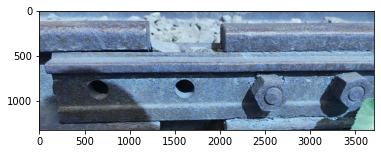

In [ ]:
import cv2
import numpy as np
img = cv2.imread('../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Defective/IMG_20201114_102222.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is Defective")

[[0.9707121]]
The railway is non defective


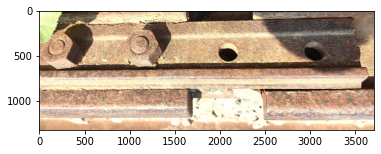

In [ ]:
import cv2
import numpy as np
img = cv2.imread('../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Defective/aug_prefix_0_6090.jpg')
plt.imshow(img)
img = cv2.resize(img,(300,300))
img = np.reshape(img,[1,300,300,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is defective")

[[0.9712385]]
The railway is non defective


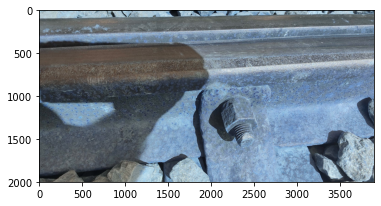

In [ ]:
import cv2
import numpy as np
img = cv2.imread("../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Non Defective/IMG_20201114_101907.jpg")
plt.imshow(img)
img = cv2.resize(img,(400,400))
img = np.reshape(img,[1,400,400,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is defective")

[[0.96970135]]
The railway is non defective


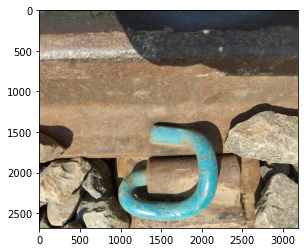

In [ ]:
import cv2
import numpy as np
img = cv2.imread('../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Non Defective/aug_prefix_0_4792.jpg')
plt.imshow(img)
img = cv2.resize(img,(400,400))
img = np.reshape(img,[1,400,400,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is defective")

[[0.97650945]]
The railway is non defective


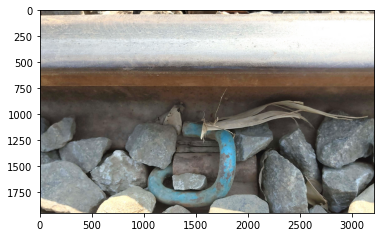

In [ ]:
import cv2
import numpy as np
img = cv2.imread('../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Non Defective/aug_prefix_0_6668.jpg')
plt.imshow(img)
img = cv2.resize(img,(400,400))
img = np.reshape(img,[1,400,400,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is defective")

[[0.97232753]]
The railway is non defective


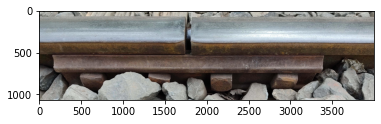

In [ ]:
import cv2
import numpy as np
img = cv2.imread('../input/railwaytrackv4/archive/Dataset _ Railway Track Fault Detection-20210713T183411Z-001/Dataset _ Railway Track Fault Detection/Test/Non Defective/aug_prefix_0_8803.jpg')
plt.imshow(img)
img = cv2.resize(img,(400,400))
img = np.reshape(img,[1,400,400,3])

y_pred = model_1.predict(img)

print(y_pred)

if y_pred>0.5:
    print("The railway is non defective")
else:
    print("The railway is defective")

In [ ]:
# Load the library
from tensorflow.keras.models import load_model
# Save the model
model_1.save('ECARRNet.h5')